In [2]:
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV,cross_val_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data = load_breast_cancer()

In [5]:
data

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [10]:
rfc = RandomForestClassifier(n_estimators=100, random_state=90)
score = cross_val_score(rfc, data.data, data.target, cv=10).mean()
score

0.9648809523809524

# 随机森林调参第一步 n_estimators

0.9666353383458647 71


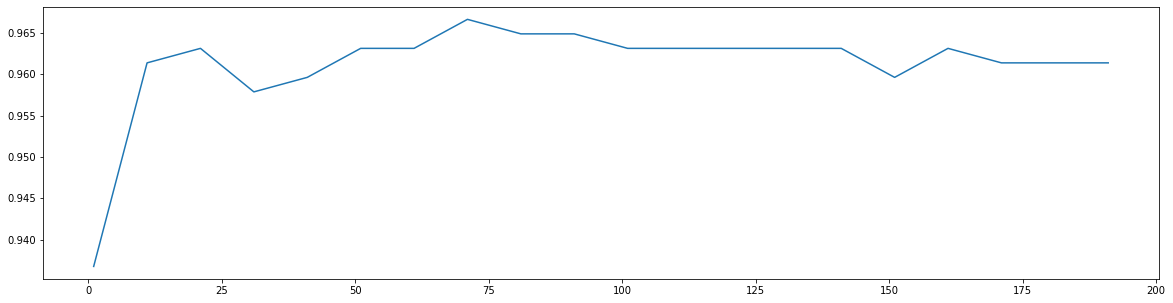

In [15]:
score1 = []
for i in range(0, 200, 10):
    rfc1 = RandomForestClassifier(n_estimators=i+1
                                  ,n_jobs=-1
                                  ,random_state=98
                                 )
    score = cross_val_score(rfc1, data.data, data.target, cv=10).mean()
    score1.append(score)
print(max(score1), (score1.index(max(score1))*10) + 1)
plt.figure(figsize=[20, 5])
plt.plot(range(1, 201, 10), score1)
plt.show()

0.9666353383458647 73


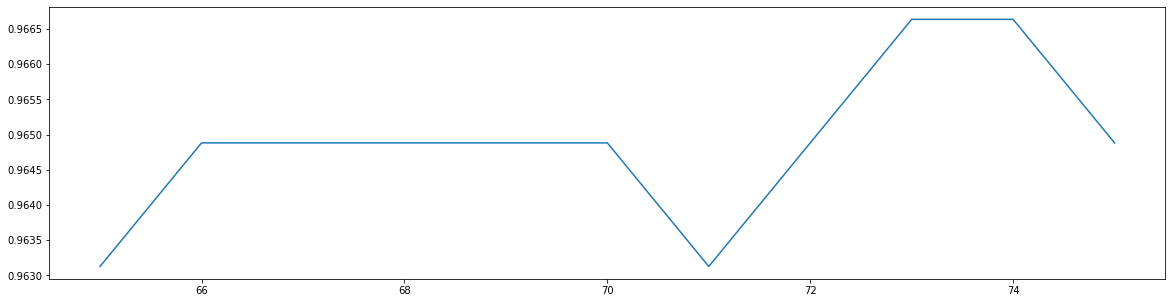

In [18]:
score2 = []
for i in range(65, 76):
    rfc2 = RandomForestClassifier(n_estimators=i
                                  ,n_jobs=-1
                                  ,random_state=90
    )
    score = cross_val_score(rfc2, data.data, data.target, cv=10).mean()
    score2.append(score)
print(max(score2), ([*range(65, 76)][score2.index(max(score2))]))
plt.figure(figsize=[20, 5])
plt.plot(range(65, 76), score2)
plt.show()

# 网格搜索

In [19]:
# 可以为参数划定范围后再来进行网格搜索
#首先调整最大深度
param_grid = {'max_depth':np.arange(1, 20, 1)}
rfc = RandomForestClassifier(n_estimators=73
                            ,random_state=90
                            )
GS = GridSearchCV(rfc, param_grid, cv=10)
GS.fit(data.data, data.target)

GS.best_params_

{'max_depth': 8}

In [22]:
GS.best_score_

0.9666666666666668

In [21]:
param_grid = {'max_features':np.arange(5, 30, 1)}
rfc = RandomForestClassifier(n_estimators=73
                            ,random_state=90
                            )
GS = GridSearchCV(rfc, param_grid, cv=10)
GS.fit(data.data, data.target)
GS.best_params_

{'max_features': 24}

In [23]:
GS.best_score_

0.9666666666666668

In [28]:
param_grid = {'criterion': ['gini', 'entropy']}
rfc = RandomForestClassifier(n_estimators=73
                            , random_state=90
                            , max_depth=8
                            , max_features=24
                            )
GS = GridSearchCV(rfc, param_grid, cv=10)
GS.fit(data.data, data.target)
GS.best_params_

{'criterion': 'gini'}

In [27]:
GS.best_score_

0.9666353383458647